<a href="https://colab.research.google.com/github/Chamara-g/pre-datastorm-v1-0/blob/master/pre_data_storm_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

In [80]:
#read train data set
df = pd.read_csv("drive/My Drive/FYP/dataset/credit_card_default_train.csv")
df.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


In [81]:
#train data set pre processing

#convet to string balance limit to float
df.Balance_Limit_V1 = (df.Balance_Limit_V1.replace(r'[KMB]+$', '', regex=True).astype(float) * df.Balance_Limit_V1.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))
df.head()

#gender education marital age stringto int convert
df.Gender.replace(['M', 'F'], [1, 0], inplace=True)
df.EDUCATION_STATUS.replace(['Graduate', 'High School', 'Other'], [2, 1, 0], inplace=True)
df.MARITAL_STATUS.replace(['Other', 'Single'], [1, 0], inplace=True)
df.AGE.replace(['Less than 30', '31-45', '46-65','More than 65'], [3, 2, 1, 0], inplace=True)

df.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,A2,1000000.0,1,2,1,2,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
1,A3,1000000.0,0,1,1,3,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
2,A4,100000.0,0,1,0,2,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
3,A5,200000.0,0,2,0,2,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
4,A6,1000000.0,0,2,1,2,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Balance_Limit_V1, dtype: object

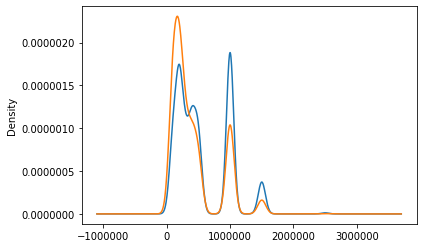

In [82]:
df.groupby("NEXT_MONTH_DEFAULT").Balance_Limit_V1.plot(kind='kde')

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Balance_Limit_V1, dtype: object

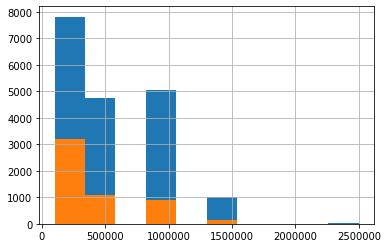

In [83]:
df.groupby("NEXT_MONTH_DEFAULT").Balance_Limit_V1.hist()

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Gender, dtype: object

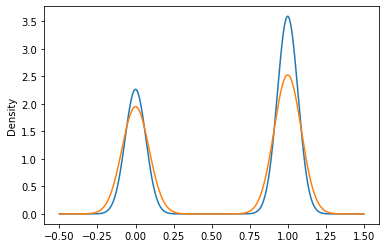

In [84]:
df.groupby("NEXT_MONTH_DEFAULT").Gender.plot(kind='kde')

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Gender, dtype: object

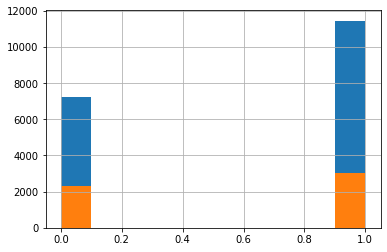

In [85]:
df.groupby("NEXT_MONTH_DEFAULT").Gender.hist()

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: EDUCATION_STATUS, dtype: object

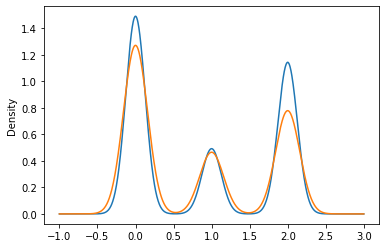

In [86]:
df.groupby("NEXT_MONTH_DEFAULT").EDUCATION_STATUS.plot(kind='kde')

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: EDUCATION_STATUS, dtype: object

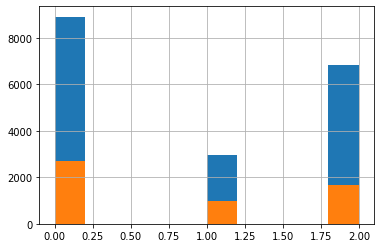

In [87]:
df.groupby("NEXT_MONTH_DEFAULT").EDUCATION_STATUS.hist()

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MARITAL_STATUS, dtype: object

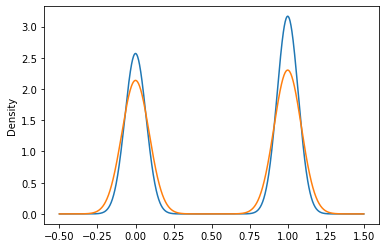

In [88]:
df.groupby("NEXT_MONTH_DEFAULT").MARITAL_STATUS.plot(kind='kde')

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MARITAL_STATUS, dtype: object

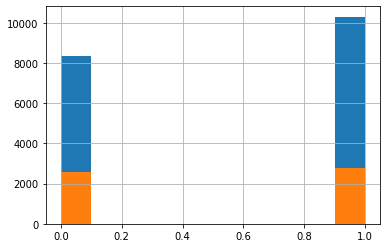

In [89]:
df.groupby("NEXT_MONTH_DEFAULT").MARITAL_STATUS.hist()

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AGE, dtype: object

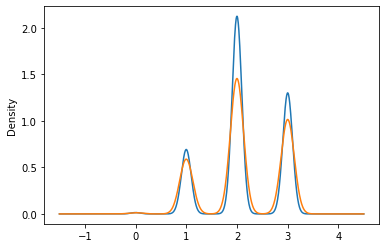

In [90]:
df.groupby("NEXT_MONTH_DEFAULT").AGE.plot(kind='kde')

NEXT_MONTH_DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AGE, dtype: object

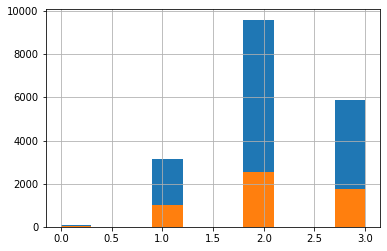

In [91]:
df.groupby("NEXT_MONTH_DEFAULT").AGE.hist()

**Corelation**

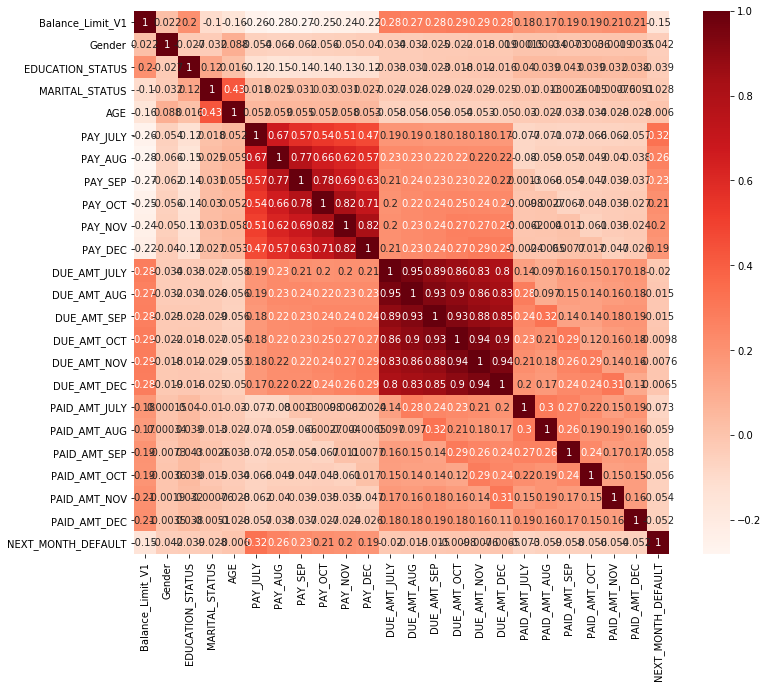

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))

cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [103]:
#Correlation with output variable
cor_target = abs(cor["NEXT_MONTH_DEFAULT"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

Balance_Limit_V1      0.148938
PAY_JULY              0.324362
PAY_AUG               0.260531
PAY_SEP               0.229338
PAY_OCT               0.212407
PAY_NOV               0.201231
PAY_DEC               0.187095
PAID_AMT_JULY         0.072891
PAID_AMT_AUG          0.059039
PAID_AMT_SEP          0.057808
PAID_AMT_OCT          0.056143
PAID_AMT_NOV          0.053849
PAID_AMT_DEC          0.052466
NEXT_MONTH_DEFAULT    1.000000
Name: NEXT_MONTH_DEFAULT, dtype: float64

**PCA for Data Visualization**

In [0]:
X = df.drop("NEXT_MONTH_DEFAULT",1)   #Feature Matrix
X = df.drop("Client_ID",1)
y = df["NEXT_MONTH_DEFAULT"]          #Target Variable

In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['NEXT_MONTH_DEFAULT']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,NEXT_MONTH_DEFAULT
0,306454.108939,-421479.912259,0
1,440478.360112,-214461.665066,0
2,-480175.862855,46095.507019,1
3,-275809.030578,163816.674354,1
4,852760.261767,383804.119051,0


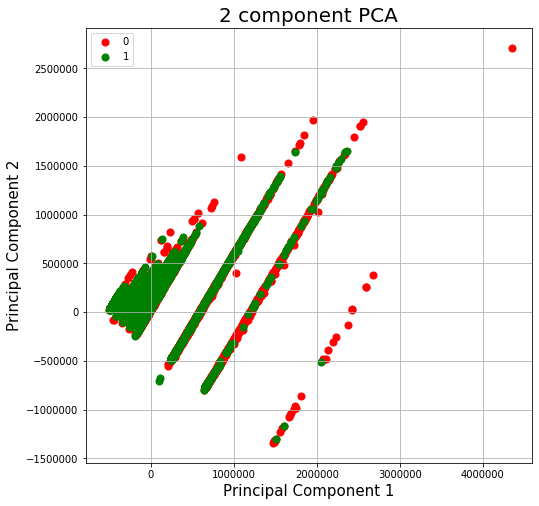

In [96]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['NEXT_MONTH_DEFAULT'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [99]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
df1 = pca_result[:,0]
df2 = pca_result[:,1] 
df3 = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.60813739 0.31786064 0.02342274]


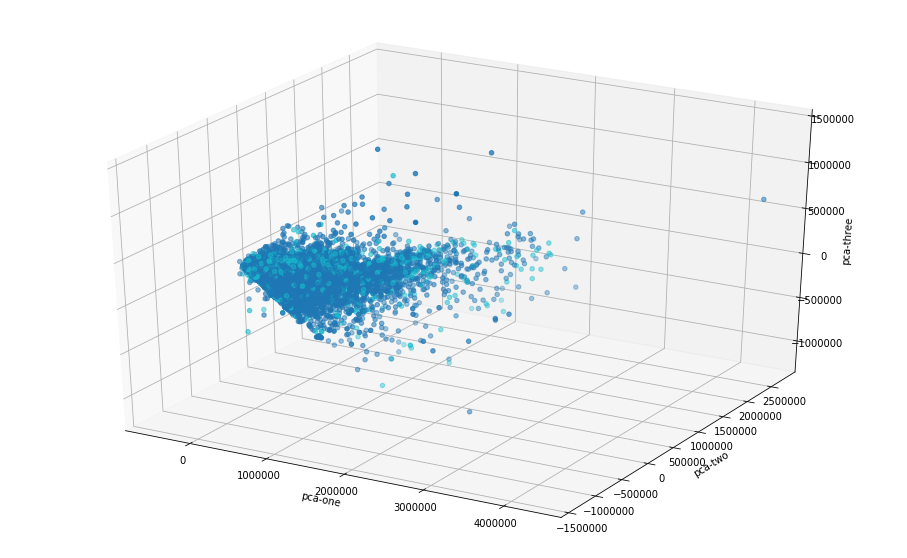

In [100]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df1, 
    ys=df2, 
    zs=df3, 
    c=finalDf['NEXT_MONTH_DEFAULT'], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()